1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem.
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

**Submit Link**: https://forms.gle/CwmpBrfa2SYQic7G6

## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount("/content/drive")

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'AnnualIncome'}>,
        <Axes: title={'center': 'FamilyMembers'}>],
       [<Axes: title={'center': 'ChronicDiseases'}>,
        <Axes: title={'center': 'TravelInsurance'}>]], dtype=object)

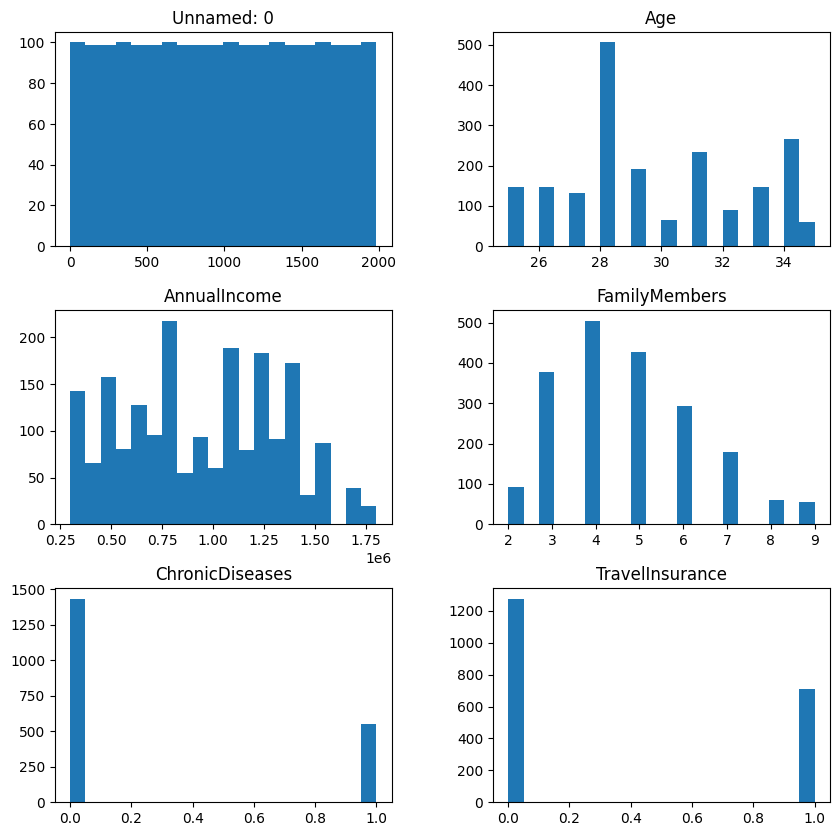

In [2]:
import pandas as pd
PATH = "TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
display(df.head())
#ToDo: Show histogram of dataframe
df.hist(figsize=(10, 10), bins=20, grid=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [4]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


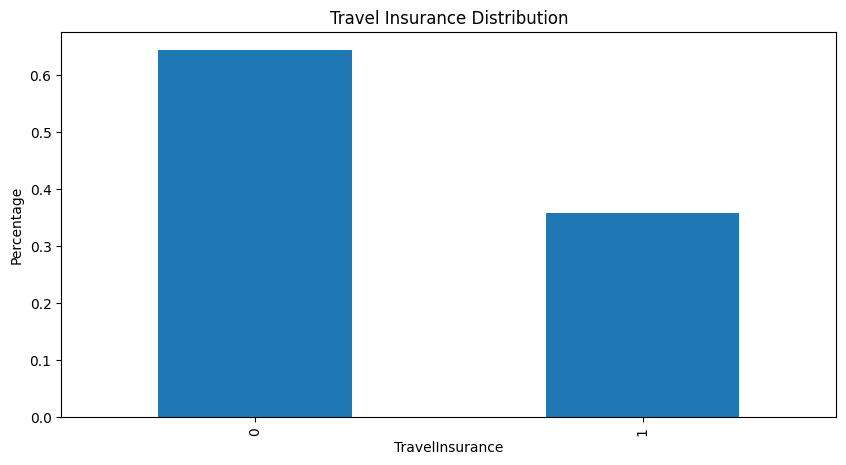

In [5]:
# Show percentage of each class
plt.figure(figsize=(10, 5))
plt.title('Travel Insurance Distribution')
plt.xlabel('Travel Insurance')
plt.ylabel('Percentage')
df['TravelInsurance'].value_counts(normalize=True).plot(kind='bar')
plt.show()

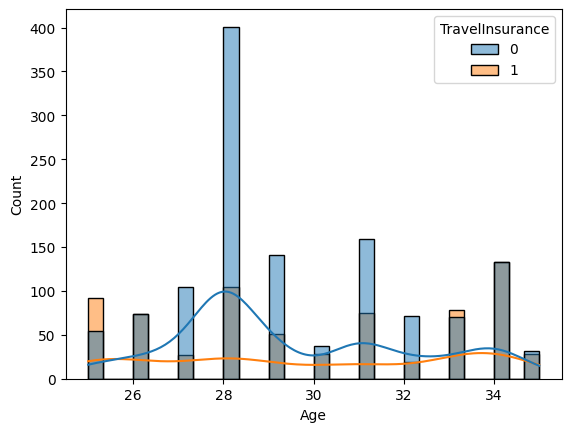

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, x="Age", kde=True, hue='TravelInsurance', bins=30)
plt.show()

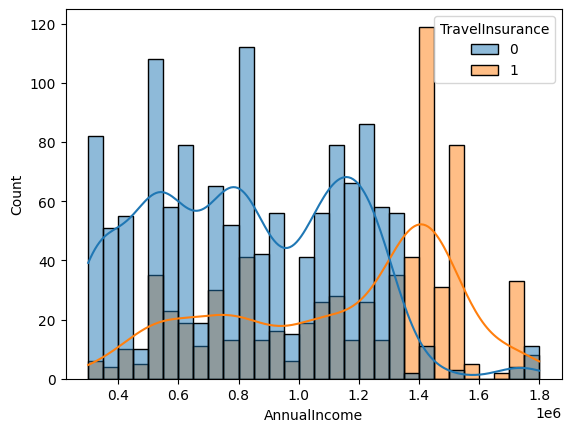

In [7]:
sns.histplot(df, x="AnnualIncome", kde=True, hue='TravelInsurance', bins=30)
plt.show()

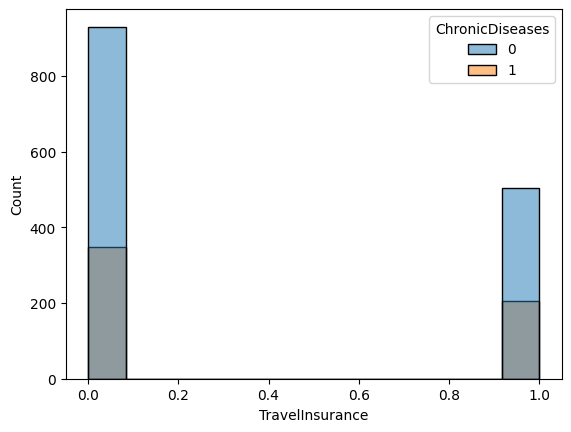

In [8]:
sns.histplot(df, x='TravelInsurance', hue="ChronicDiseases")
plt.show()

## Data Analysis

In [9]:
# Data analysis
# Todo: analyze your data here
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(1987, 10)

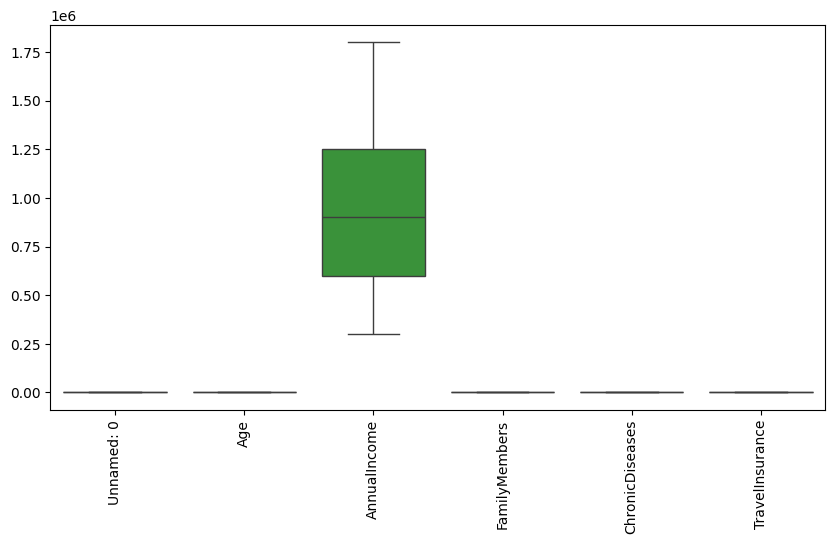

In [12]:
# Boxplot Numerical Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

## Preprocessing

In [13]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
    '''if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])'''
        
    return df

In [14]:
df = preprocessing_data(df.copy())
display(df.head())

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Feature Engineering

<Axes: >

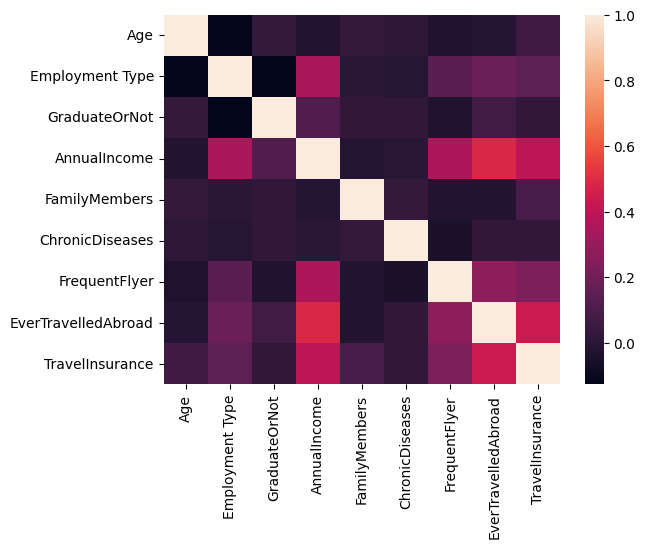

In [15]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    categorical_data = df.select_dtypes(include=['object']).columns
    for col in categorical_data:
        df[col] = df[col].astype('category').cat.codes
        
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [16]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Split data into X and y
    feature_names = df.columns.tolist()
    feature_names.remove("TravelInsurance")
    
    X = df[feature_names].values  # Todo: Select features
    y = df.TravelInsurance.values  # Todo: Select label

    return X, y

X, y = prepare_X_y(df)

In [17]:
y.shape

(1987,)

In [18]:
np.reshape(y, (1987, -1)).shape

(1987, 1)

# Apply machine learning model

## Train-test split

In [19]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(MinMaxScaler(), PCA(), GaussianNB())
    
    # Parameters of pipelines can be set using '__' separated parameter names:
    var_smoothing_values = np.logspace(-4, -9, num=100)
    param_grid = {
        "minmaxscaler__feature_range": [(-1, 1), (0, 1)],
        'gaussiannb__var_smoothing': var_smoothing_values
        }
    
    # Todo: fit your model with X, y
    search = GridSearchCV(model, param_grid, scoring='recall', n_jobs=-1, cv=5, verbose=1)
    search.fit(trainX, trainY)

    return search

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))
    print("classification report", classification_report(y_true, y_pred)) 
    print("confusion matrix\n", confusion_matrix(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1_score(y_true, y_pred)
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
precision 0.8382352941176471
recall 0.5327102803738317
accuracy 0.7956448911222781
F1 0.6514285714285715
classification report               precision    recall  f1-score   support

           0       0.78      0.94      0.86       383
           1       0.84      0.53      0.65       214

    accuracy                           0.80       597
   macro avg       0.81      0.74      0.75       597
weighted avg       0.80      0.80      0.78       597

confusion matrix
 [[361  22]
 [100 114]]


0.6514285714285715

In [21]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. " \
           "Other conclusion: "\
           "Main metric: Do bài toán có dữ liệu lệch lớp nên F1-score là lựa chọn tốt nhất cho việc cân bằng giữa precision và recall. "\
           "Scaler: MinMaxScaler chuẩn hóa dữ liệu trong (-1, 1) phù hợp với Naive Bayes kết hợp với PCA."\
           "Dimensionality reduction: PCA được sử dụng để giảm nhiễu và giảm số chiều, giúp GaussianNB hoạt động ổn định hơn."\
           "Naive Bayes model: GaussianNB giúp làm mượt covariance matrix."\
           "Tỷ lệ người không mua bảo hiểm lệch khá nhiều so với người mua bảo hiểm. Dữ liệu chứa nhiều thuộc tính phân loại, tương đối đơn giản và thiếu đặc trưng mang tính phân biệt ảnh hưởng khả năng dự đoán của mô hình."